# Final Exam- Data Wrangling 
# Teacher: Sir Tariq 
# Student: Muhammad Ammar Jamshed 

 What is the problem you will solve with the EDA? Or What questions you will answer? [Define at least 5-10 questions]
 
 Find out all the data entry errors
 
 Convert them to missing values
 
 Deal with all missing values by using concepts taught in the class (and their relevant charts)
 
 Remove any unnecessary data
 
 Detect outliers
 
 Conduct EDA (by using scatterplots, bar, correlation heatmaps, histograms, t-tests, anova etc.) and describe at each step what you understand about the data
Use Google’s Data Studio to find out more insights.
Submit the GDS insights as well as the notebook on Saturday 6th Feb, 2021. If you do not submit, then it will be marked 0.


We are Analysing data of the property market in NewYork in terms of the transactions of sales of property and their market valuation
and my goal over here is to determine the relationship between the Tax class and Sale Price of a house depending on its locality and how it relates to the commercial and residential units bought
and furthermore how their YearBuilt affects the present sale price

In [2]:
# we shall import all the nessecary libraries we need to for now calculate and analyse numerical dataframes to generate
# their descriptive insights
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as mn 
%matplotlib inline

In [3]:
# we use panda to import the file and read it with pandas 
df = pd.read_csv(r'C:\Users\muham\Downloads\ml.csv', low_memory=False)

In [4]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [5]:
# lets see the statistical description of the file
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [6]:
# lets check all the data types
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [7]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

# 1) lets check for any incorrect values using value_counts() and Convert them to missing values

In [8]:
df['mass'].value_counts()

1.30       171
1.20       140
1.40       138
2.10       130
2.40       126
          ... 
205.63       1
2604.40      1
1917.70      1
70.25        1
1360.20      1
Name: mass, Length: 12576, dtype: int64

none detected in BOROUGH

In [106]:
df['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
EAST RIVER                     1
PELHAM BAY                     1
CITY ISLAND-PELHAM STRIP       1
BRONX PARK                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

none detected in NEIGHBORHOOD     

In [107]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4348
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1426
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

none detected 

In [108]:
df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

none detected

In [109]:
df['BLOCK'].value_counts()

5066.0     404
16.0       255
2135.0     211
4978.0     187
1171.0     181
          ... 
16194.0      1
10386.0      1
1898.0       1
14027.0      1
11994.0      1
Name: BLOCK, Length: 11566, dtype: int64

none detected

In [110]:
df['LOT'].value_counts()

1       4125
20       983
12       972
40       935
23       911
        ... 
3540       1
2056       1
3832       1
900        1
499        1
Name: LOT, Length: 2629, dtype: int64

none detected

In [111]:
df['EASE-MENT'].value_counts()

     84548
Name: EASE-MENT, dtype: int64

none detected

In [112]:
df['BUILDING CLASS AT PRESENT'].value_counts()

D4       12663
R4       12482
A1        6753
A5        5683
B2        4923
         ...  
65000        1
Q8           1
Z7           1
J1           1
Y1           1
Name: BUILDING CLASS AT PRESENT, Length: 168, dtype: int64

none detected

In [113]:
df['ADDRESS'].value_counts()

131-05 40TH   ROAD         210
429 KENT AVENUE            158
169 WEST 95TH   STREET     153
131-03 40TH   ROAD         147
265 STATE STREET           127
                          ... 
3233 CRUGER AVENUE           1
1014 DEAN AVENUE             1
2040A EAST 12TH STREET       1
464 NEPTUNE AVENUE, 17C      1
2250 BRIGHAM STREET, 2H      1
Name: ADDRESS, Length: 67529, dtype: int64

none detected

In [114]:
df['APARTMENT NUMBER'].value_counts()

         65495
4          298
3A         295
2          275
3B         275
         ...  
S30          1
4310         1
36E          1
RPH1A        1
16 B         1
Name: APARTMENT NUMBER, Length: 3989, dtype: int64

no error detected

In [115]:
df['ZIP CODE'].value_counts()

10314.0    1687
11354.0    1384
11201.0    1324
11235.0    1312
11234.0    1165
           ... 
10105.0       5
11430.0       1
10803.0       1
10281.0       1
10167.0       1
Name: ZIP CODE, Length: 186, dtype: int64

no error detected

In [116]:
df['RESIDENTIAL UNITS'].value_counts()

1      34722
0      24783
2      16049
3       4608
4       1346
       ...  
164        1
420        1
165        1
550        1
283        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64

no error detected

In [117]:
df['COMMERCIAL UNITS'].value_counts()

0       79429
1        3558
2         817
3         259
4         137
5          74
6          70
7          31
8          26
9          20
10         17
12         12
15         11
11         10
17          6
14          6
254         4
13          4
35          4
20          4
19          3
42          3
22          3
18          3
422         2
436         2
26          2
25          2
16          2
126         2
73          1
67          1
318         1
147         1
2261        1
62          1
59          1
184         1
56          1
55          1
52          1
51          1
49          1
172         1
38          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
24          1
21          1
23          1
Name: COMMERCIAL UNITS, dtype: int64

no errors detected 

In [118]:
df['TOTAL UNITS'].value_counts()

1      38356
0      19762
2      15914
3       5412
4       1498
       ...  
420        1
165        1
551        1
104        1
92         1
Name: TOTAL UNITS, Length: 192, dtype: int64

In [119]:
df['LAND SQUARE FEET'].value_counts()

 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
7350         1
3087         1
61399        1
4719         1
4322         1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

error - detected

In [120]:
# we shall replace the - with NaN
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], downcast='integer', errors='coerce')

In [121]:
df['GROSS SQUARE FEET'].value_counts()

 -        27612
0         11417
2400        386
1800        361
2000        359
          ...  
400531        1
7366          1
9536          1
30576         1
5679          1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

error - detected

In [122]:
# we shall replace the - with Nan
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], downcast='integer', errors='coerce')

In [123]:
df['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
        ... 
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

no errors detected

In [124]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

no errors detected

In [125]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
HS        1
Q8        1
Z7        1
J1        1
Y1        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 166, dtype: int64

no errors detected

In [126]:
df['SALE PRICE'].value_counts()

 -         14561
0          10228
10           766
450000       427
550000       416
           ...  
232100         1
2210000        1
893718         1
551250         1
8251359        1
Name: SALE PRICE, Length: 10008, dtype: int64

error - detected

In [127]:
# we shall replace the - with Nan
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], downcast='integer', errors='coerce')

In [128]:
df['SALE DATE'].value_counts()

6/29/2017 0:00     544
6/15/2017 0:00     530
12/22/2016 0:00    527
5/25/2017 0:00     511
10/6/2016 0:00     508
                  ... 
not sure             1
why                  1
6/4/2017 0:00        1
later                1
8/13/2017 0:00       1
Name: SALE DATE, Length: 367, dtype: int64

errors 'later', 'why' and 'not sure' detected

In [129]:
# we shall replace the errors with NaT
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

# So we have seen with our data cleaning and analysis above that even though we only got errors in the columns of  SALE DATE(DATETIME), SALE PRICE(int), GROSS SQUARE FOOT(int)and LAND SQUARE FOOT(int), we did however discover substantial NULL values in all columns which shall be cleaned in the next step.

# 2)Remove any unnecessary data

In [130]:
df.dtypes

Unnamed: 0                                 int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                    float64
LOT                                       object
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

In [131]:
# we shall drop columns useless to our analysis 
# ADDRESS, APARTMENT NUMBER, Unnamed, EASE-MENT 
df = df.drop(['APARTMENT NUMBER','EASE-MENT'], axis=1)

In [132]:
df.dtypes

Unnamed: 0                                 int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                    float64
LOT                                       object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

In [133]:
df = df.drop(['ADDRESS','Unnamed: 0'], axis=1)

In [134]:
# since block is irrelevant to us we shall drop it here 
df = df.drop(['BLOCK'], axis=1)

In [135]:
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
LOT                                       object
BUILDING CLASS AT PRESENT                 object
ZIP CODE                                 float64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

# Thus we have successfully dropped our unrequired columns for further analysis

# 3) now we shall detect outliers in our data and replace missing values

In [136]:
# first lets check all the null values 
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

In [137]:
# lets import missingno library and check heatmap, bar and matrix for missing values and their relationships
import missingno as mn

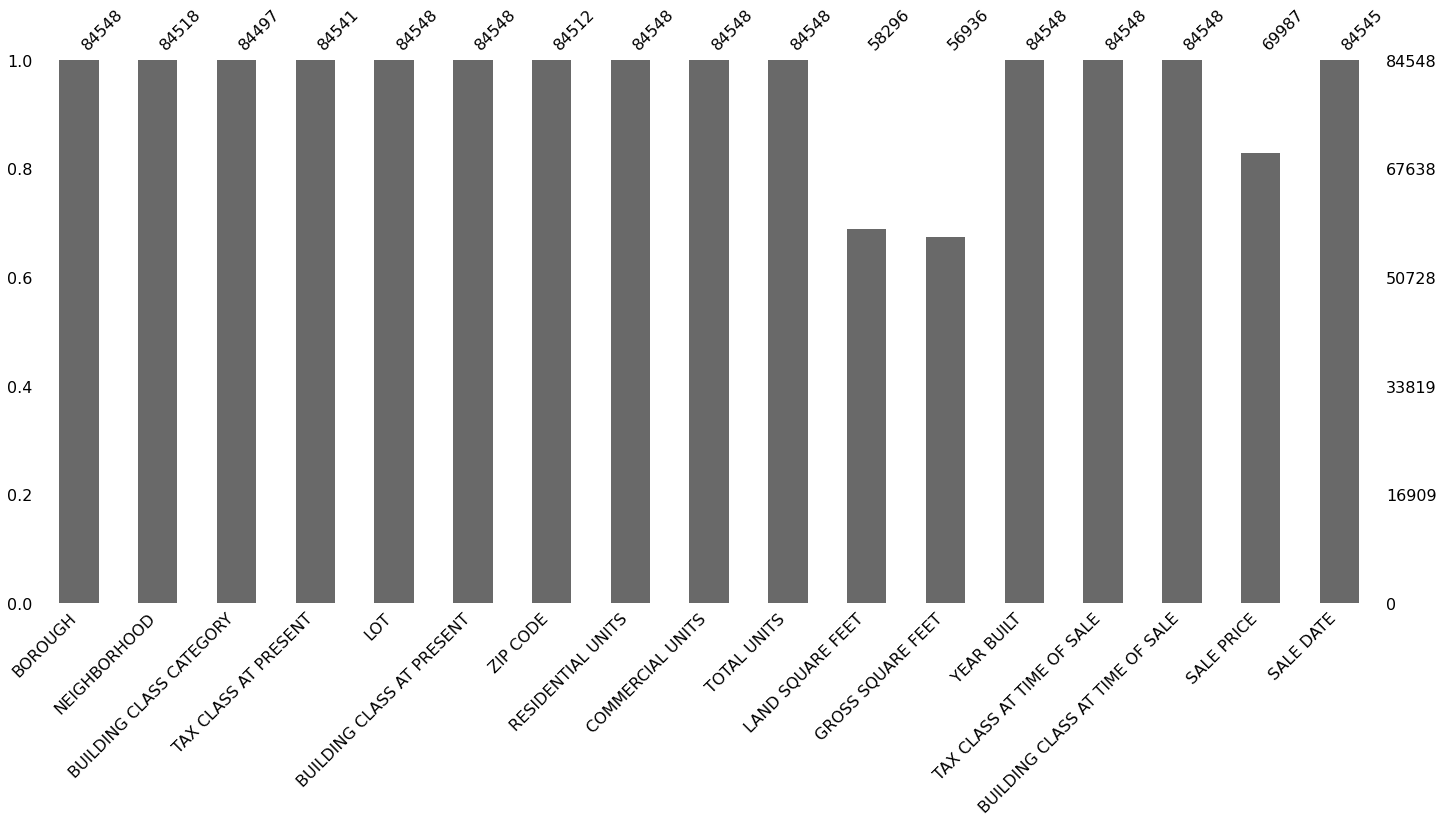

In [138]:
mn.bar(df)

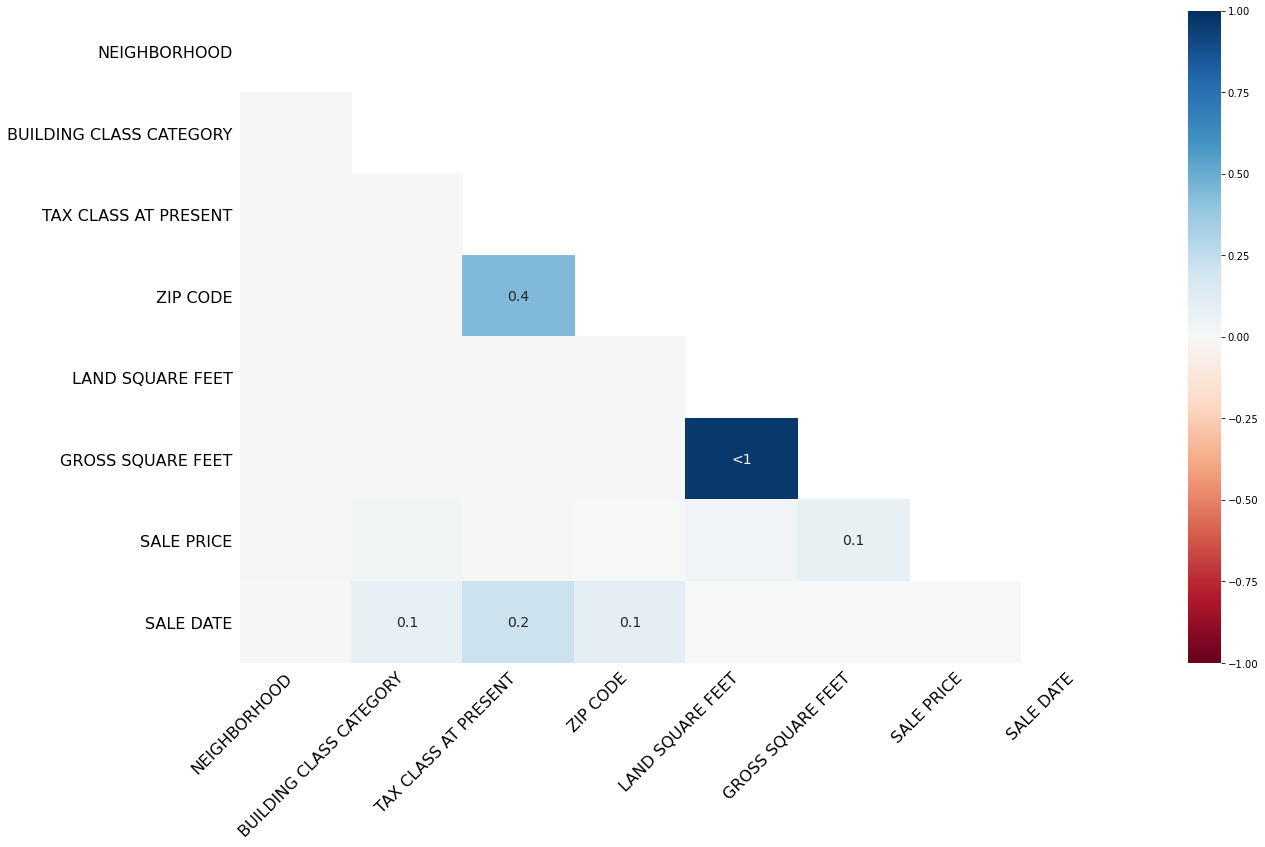

In [139]:
mn.heatmap(df)

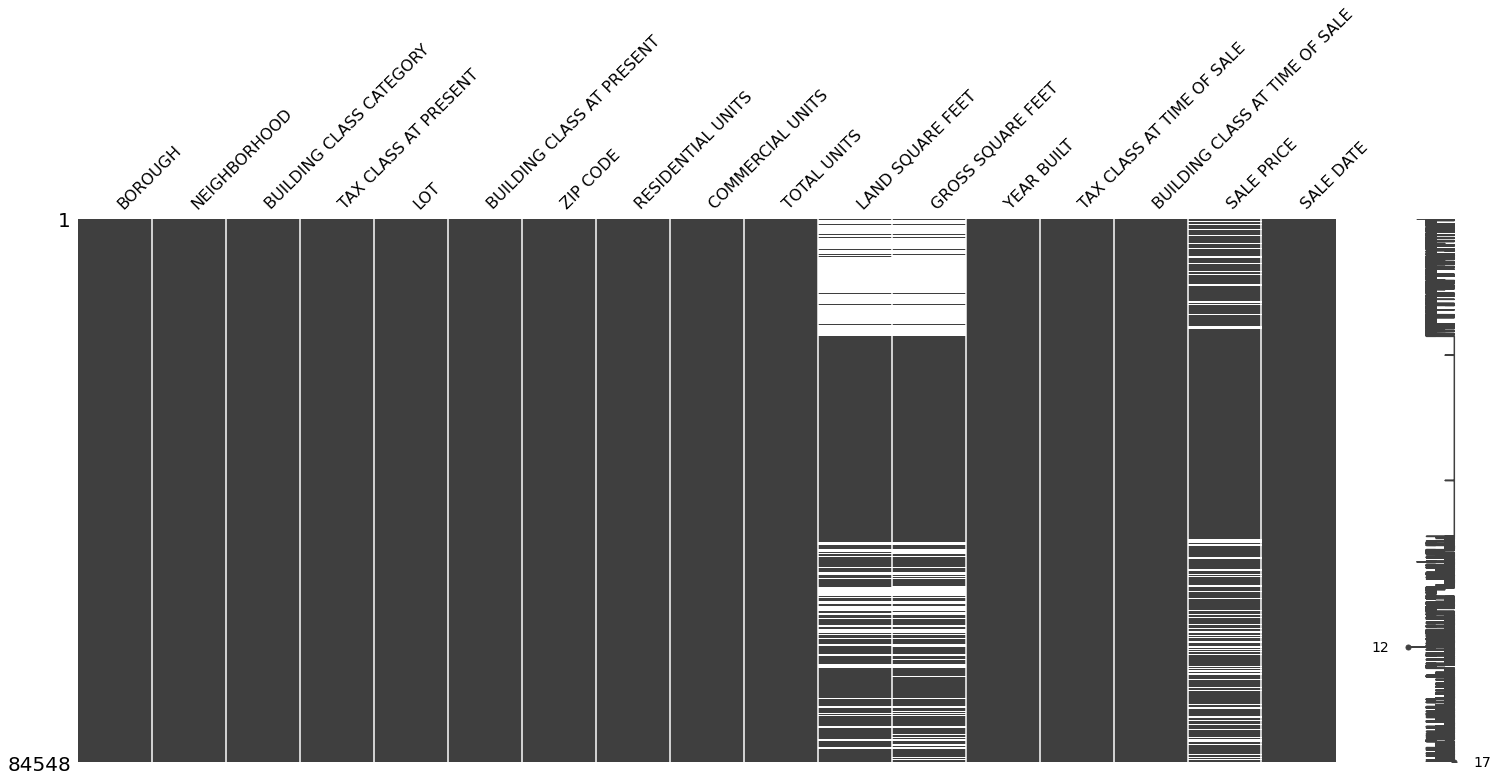

In [140]:
mn.matrix(df)

In [141]:
#first we look for the null values in NEIGHBORHOOD, Based on which one relates to BOROUGH
print(df[df['NEIGHBORHOOD'].isnull()]['BOROUGH'].value_counts())

2    18
3    12
Name: BOROUGH, dtype: int64


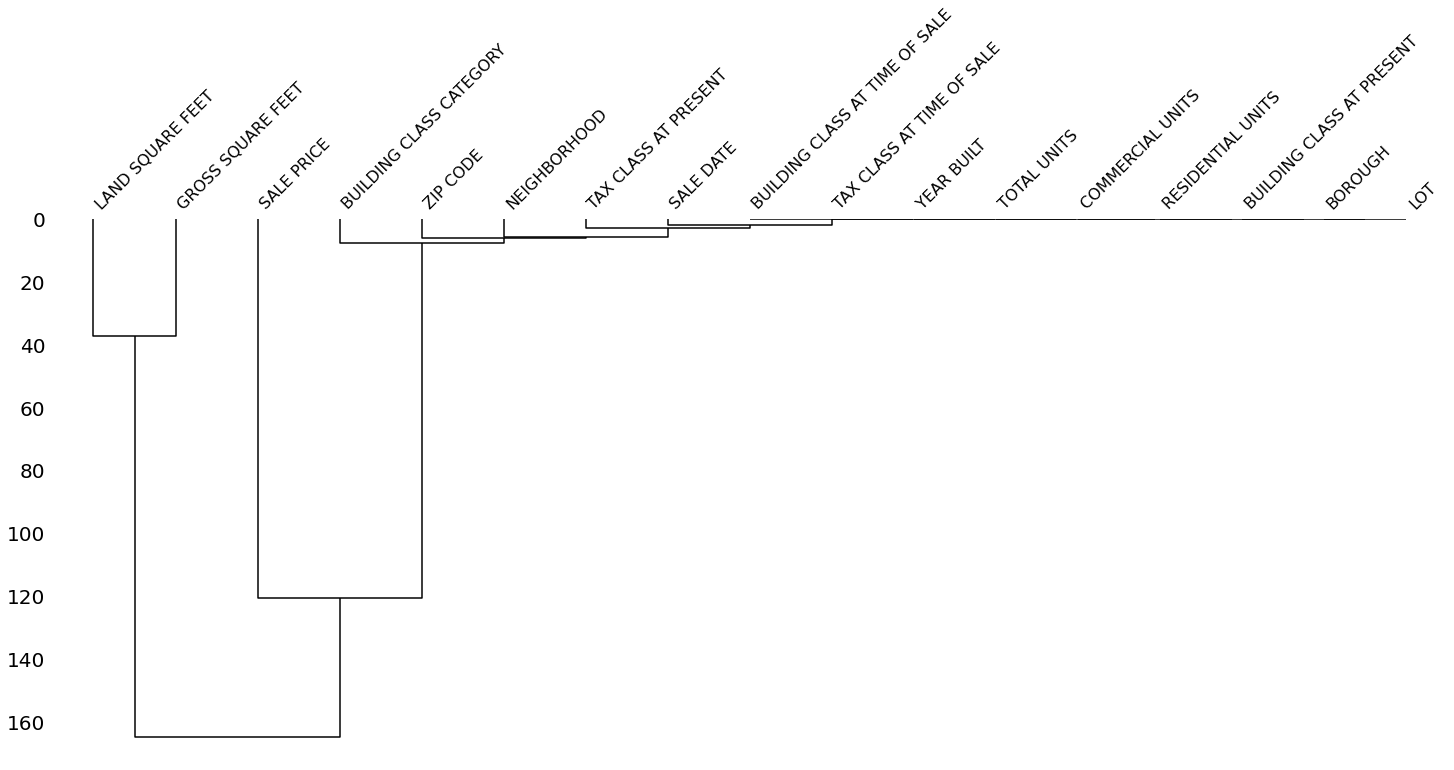

In [142]:
mn.dendrogram(df)

Data is missing at Random as there is a systematic relationship between the missing columns which shall be dealt with below
and shall fill them using statistical programming techniques

In [143]:
# As checked in Excel 3 is WYCKOFF HEIGHTS and 2 is BATHGATE
cond = (df['BOROUGH'] == 2) & (df['NEIGHBORHOOD'].isnull())
df.loc[cond, 'NEIGHBORHOOD'] = 'BATHGATE'

In [144]:
cond1 = (df['BOROUGH'] == 3) & (df['NEIGHBORHOOD'].isnull())
df.loc[cond1, 'NEIGHBORHOOD'] = 'WYCKOFF HEIGHTS'

In [145]:
# now that we have replaced missing values associated with WYCKOFF HEIGHTS and 2 is BATHGATE, 
# lets check if that succeeded
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

Thus  we have filled missing values with neighbourhood 


In [146]:
# since building class category is not that relevant in our analysis thus we shall use mode to simply fill up the null values
# aS WE NEED IT for further refrence for investor knowledge, we cannot drop it
df['BUILDING CLASS CATEGORY'].fillna(df['BUILDING CLASS CATEGORY'].mode,inplace=True)

In [147]:
# lets check if our code runned properly
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  7
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

thus we have filled the null values of 'BUILDING CLASS CATEGORY']

In [148]:
# we shall use mode to replace null values
df[df['TAX CLASS AT PRESENT'].isnull()]['BUILDING CLASS CATEGORY'].value_counts()

07 RENTALS - WALKUP APARTMENTS                 6
08 RENTALS - ELEVATOR APARTMENTS               1
Name: BUILDING CLASS CATEGORY, dtype: int64

In [149]:
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode,inplace=True)

In [150]:
# lets check for success
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

thus we have succeded in filling null values in Tax Class at Present 

In [151]:
# we shall use NEIGHBOURHOOD TO FILL ZIPCODE NULL VALUES
df[df['ZIP CODE'].isnull()]['NEIGHBORHOOD'].value_counts()

ALPHABET CITY    15
COLLEGE POINT    11
SOUTH JAMAICA    10
Name: NEIGHBORHOOD, dtype: int64

In [152]:
# based on our analysis of the excel file
#  ALPHABET CITY's ZIP CODE is 10009
# COLLEGE POINT's ZIP CODE is 11356
# SOUTH JAMAICA's ZIP CODE is 11435
cond4 = (df['NEIGHBORHOOD'] == 'ALPHABET CITY') & (df['ZIP CODE'].isnull())
df.loc[cond4, 'ZIP CODE'] = 10009

In [153]:
cond5 = (df['NEIGHBORHOOD'] == 'COLLEGE POINT') & (df['ZIP CODE'].isnull())
df.loc[cond5, 'ZIP CODE'] = 11356
cond6 = (df['NEIGHBORHOOD'] == 'SOUTH JAMAICA') & (df['ZIP CODE'].isnull())
df.loc[cond6, 'ZIP CODE'] = 11435

In [154]:
# lets check if our null values of ZIP CODE have been filled 
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

thus we have successfully filled the NULL values of ZIP CODE

In [155]:
# Now we shall use Interpolation to fill the nearest values of LAND SQUARE FEET and GROSS SQUARE FEET              
# As we have to be be sure all values calculated in this numerical measurement fit within a certain range 
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].interpolate(method='linear', limit_direction='forward')

In [156]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].interpolate(method='linear', limit_direction='forward')

In [157]:
# lets see if our Interpolation was a success
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

accidently created extra columns of LAND SQUARE FEET.interpolate, GROSS SQUARE FEET.interpolate 
But removed null values successfully

In [158]:
# we shall replace Sale Price using Interpolation as well and replace SALE DATE with mode since there are
#only 3 missing values
# we shall use backward here as we have more missing values on backdates and use linear method as that 
# is the safest way to get the accurate prices amongst x or y variables
df['SALE PRICE'] = df['SALE PRICE'].interpolate(method='linear', limit_direction='backward')

In [159]:
# lets check our success in filling the null values 
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         3
dtype: int64

In [160]:
# now we just hve to replace SALE DATE with mode
df['SALE DATE'].fillna(df['SALE DATE'].mode,inplace=True)

In [161]:
# now lets test if we have successfully filled all null values in all columns using the programming statistical
# procedures abpve
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Thus Null and NaN all values have been successfully filled 

# 4) now we shall detect for outliers in the numerical data columns we want to analyse further which are
# SALE PRICE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS
# and further analyse their relationships to SALE PRICE

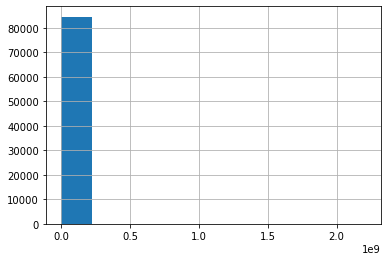

In [162]:
df['SALE PRICE'].hist();

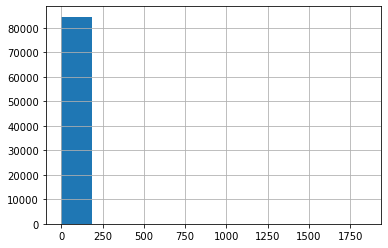

In [163]:
df['RESIDENTIAL UNITS'].hist();

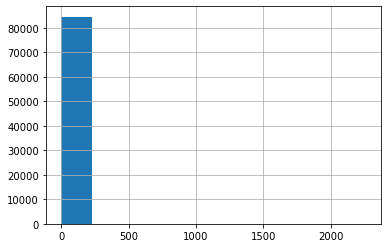

In [164]:
df['COMMERCIAL UNITS'].hist();

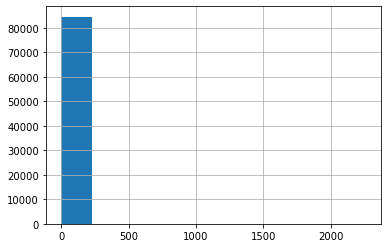

In [165]:
df['TOTAL UNITS'].hist();

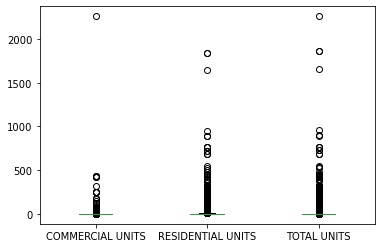

In [166]:
# lets use a boxplot to determine if there are outliers as we cannot see it through 
# histogram
df[['COMMERCIAL UNITS','RESIDENTIAL UNITS','TOTAL UNITS']].plot.box();

BOROUGH                           84495
NEIGHBORHOOD                      84495
BUILDING CLASS CATEGORY           84495
TAX CLASS AT PRESENT              84495
LOT                               84495
BUILDING CLASS AT PRESENT         84495
ZIP CODE                          84495
RESIDENTIAL UNITS                 84495
COMMERCIAL UNITS                  84495
TOTAL UNITS                       84495
LAND SQUARE FEET                  84495
GROSS SQUARE FEET                 84495
YEAR BUILT                        84495
TAX CLASS AT TIME OF SALE         84495
BUILDING CLASS AT TIME OF SALE    84495
SALE PRICE                        84495
SALE DATE                         84495
dtype: int64


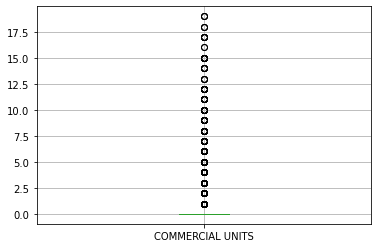

In [167]:
# we shall now see that at what rate can we mitigate these outliers
subset = df[df['COMMERCIAL UNITS']<20]
print(subset.count())

subset.boxplot(column='COMMERCIAL UNITS', sym='o', return_type='axes');

which shows there are alot of outliers in 'Commercial Units' and they are present in dense quanitity and cant to mitigated at any suitable rate

BOROUGH                           84495
NEIGHBORHOOD                      84495
BUILDING CLASS CATEGORY           84495
TAX CLASS AT PRESENT              84495
LOT                               84495
BUILDING CLASS AT PRESENT         84495
ZIP CODE                          84495
RESIDENTIAL UNITS                 84495
COMMERCIAL UNITS                  84495
TOTAL UNITS                       84495
LAND SQUARE FEET                  84495
GROSS SQUARE FEET                 84495
YEAR BUILT                        84495
TAX CLASS AT TIME OF SALE         84495
BUILDING CLASS AT TIME OF SALE    84495
SALE PRICE                        84495
SALE DATE                         84495
dtype: int64


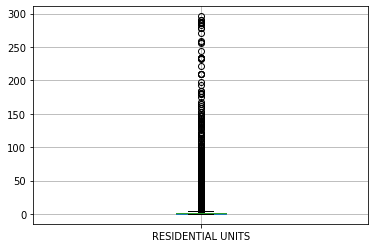

In [168]:
subset1 = df[df['RESIDENTIAL UNITS'] < 300]
print(subset.count())

subset1.boxplot(column='RESIDENTIAL UNITS', sym='o', return_type='axes');

THIS  shows that RESIDENTIAL UNITS also has many outliers but far less than commwerical Units and can outliers can be mitigated here but at a very low rate

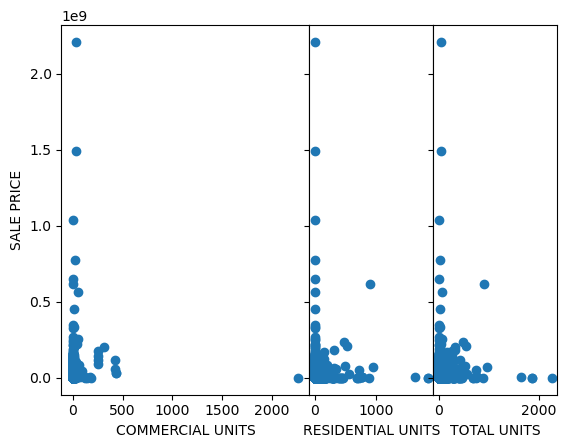

In [169]:
# we shall now use a Scatter PLot to analyse the outliers and see the relations to SALE PRICE
with plt.style.context("default"):
    fig, axes =plt.subplots(ncols=3, sharey=True,
                            gridspec_kw={'width_ratios':[2,1,1], 'wspace':0})
    y ='SALE PRICE'
    xs =['COMMERCIAL UNITS','RESIDENTIAL UNITS','TOTAL UNITS']
    for x, ax in zip(xs, axes):
        ax.scatter(df[x],df[y])
        ax.set_xlabel(x)
        axes[0].set_ylabel(y)

This shows that the higher the sales price the more the numer of outliers go up as at higher sales price people purchasing new properties doesn get severely affected as less and lesser people can afford properties at higher prices

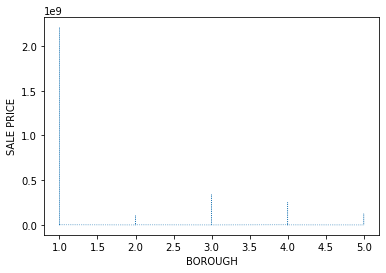

In [170]:
# we shall plot BOROUGH and SALE PRICE
fig,ax = plt.subplots()
ax.plot(df['BOROUGH'], df['SALE PRICE'],ls=':',lw=0.7)
ax.set_xlabel('BOROUGH')
ax.set_ylabel('SALE PRICE');

# This Proves that from all Properties ALPHABET CITY(1.0) has the highest valuation of SALE PRICE and is the most sought after
# and BATH BEACH(3.0) is second to that

#  5)For our final conclusion we now conduct a T-test and ANOVA between our desired columns for our desuired analysis

In [171]:
# we first here import the stats from scipy
from scipy import stats

In [172]:
# we shall conduct ttest between SALE PRICE and COMMERCIAL UNITS
test_of_SP = stats.ttest_ind(df['SALE PRICE'], df['COMMERCIAL UNITS'])
print(test_of_SP)

Ttest_indResult(statistic=35.77210376203942, pvalue=3.3480976490331708e-279)


Since the p-value is greater than 0.05, thus we fail to reject this and that 35.77 stat number shows that there is a considerable level of linkage between these columns

In [173]:
test_of_SP_R = stats.ttest_ind(df['SALE PRICE'], df['RESIDENTIAL UNITS'])
print(test_of_SP_R)

Ttest_indResult(statistic=35.77206158743943, pvalue=3.3531185686172452e-279)


Since the p-value is greater than 0.05, thus we fail to reject this and that 35.77 stat number shows that there is a considerable level of linkage between these columns as well thus our analysis above is proven more so accruate.

In [174]:
test_of_SP_D = stats.ttest_ind(df['LAND SQUARE FEET'], df['TOTAL UNITS'])
print(test_of_SP_D)

Ttest_indResult(statistic=31.34636188813814, pvalue=4.5336460077583736e-215)


Since the p-value is greater than 0.05, thus we fail to reject this and that 35.77 stat number shows that there is a considerable level of linkage between these columns as well thus our analysis above is proven more so accruate.
Thus proves that more LAND SQUARE FEET result in more units of land 

In [175]:
# we now conduct a oneway ANOVA TEST between SALE DATE and SALE PRICE
ANOVA_SP_SD = stats.f_oneway(df['SALE PRICE'], df['TAX CLASS AT TIME OF SALE'])
print(ANOVA_SP_SD)

F_onewayResult(statistic=1279.640996055685, pvalue=3.3521098363400917e-279)


Thus we have here  proven that SALE PRICE and TAX CLASS have relationship and a strong linkage at that, as the class of tax on a preperty influences its valuation of SALE PRICE

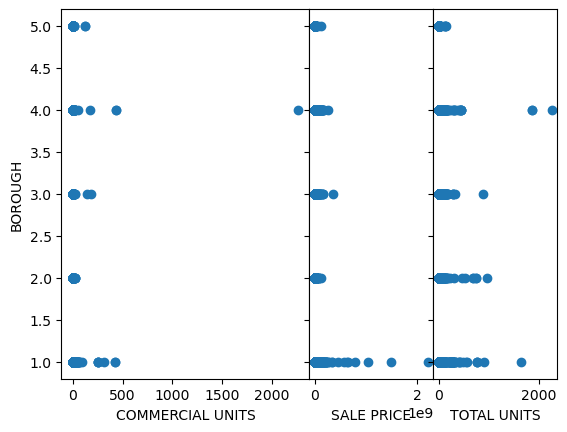

In [176]:
# we shall now see how each BOROUGH, is divivded between commercial and total and varies with the SALE PRICE
# we shall now use a Scatter PLot to analyse the outliers and see the relations to SALE PRICE
with plt.style.context("default"):
    fig, axes =plt.subplots(ncols=3, sharey=True,
                            gridspec_kw={'width_ratios':[2,1,1], 'wspace':0})
    y ='BOROUGH'
    xs =['COMMERCIAL UNITS','SALE PRICE','TOTAL UNITS']
    for x, ax in zip(xs, axes):
        ax.scatter(df[x],df[y])
        ax.set_xlabel(x)
        axes[0].set_ylabel(y);

# THUS we can now conclude that with our analysis above all numerical columns we have deterimend relatinships and tests on may have slight inaccuracies but give a near to accurate market view for investors tio determine an estimated valuation on their commercial trading of properties and their models used to value Real Estate
and That SALE PRICE has shown a direct linkage with land units demanded as shown in the scatterplot as bove, this will assist investors in estimating their cashflows and forecasting revenues.

In [177]:
# we now export this data from DATASTUDIO 
df.to_csv(r'C:\Users\muham\Downloads\FinalExamDataWrangling.csv', index = False, header=True)

RecursionError: maximum recursion depth exceeded while calling a Python object